In [42]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression

# Scipy for statistics
import scipy
import arviz as az


# PyMC3 for Bayesian Inference
# import pymc3 as pm

In [12]:
import pymc as pm

# Importing the dataset

In [14]:
columns = ['lenght_of_stay', 'age', 'infection_risk', 'routine_culturing_ratio', 'routine_xray_ratio', 'num_beds', 'med_school_affil', 'region', 'avg_census', 'num_nurses', 'avelbl_services']
df = pd.read_csv("data/dataset.txt", sep=" ", header=None, names=columns)
df.head()

,lenght_of_stay,age,infection_risk,routine_culturing_ratio,routine_xray_ratio,num_beds,med_school_affil,region,avg_census,num_nurses,avelbl_services
1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0


## Doing the regression with MCMC
* First I'll do it with only one covariate (to test)

In [15]:
df_mcmc = df[['lenght_of_stay', 'infection_risk']]
df_mcmc.head()

,lenght_of_stay,infection_risk
1,7.13,4.1
2,8.82,1.6
3,8.34,2.7
4,8.95,5.6
5,11.20,5.7


In [20]:
lr = LinearRegression()
lr.fit(np.array(df_mcmc.loc[:, ['lenght_of_stay']]).reshape(-1,1),df_mcmc['infection_risk'])
print('Intercept from library:', lr.intercept_)
print('Slope from library:', lr.coef_[0])

Intercept from library: 0.7443037459603028
Slope from library: 0.3742168626809071


In [30]:
# Create the features and response
X = df.loc[:, 'lenght_of_stay']
y = df.loc[:, 'infection_risk']

In [34]:
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sigma = 1.3)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0, sigma = 1)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sigma = 1.3)
    
    # Estimate of mean
    mean = intercept + slope * X
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sigma = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(draws=1000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, slope, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 608 seconds.


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

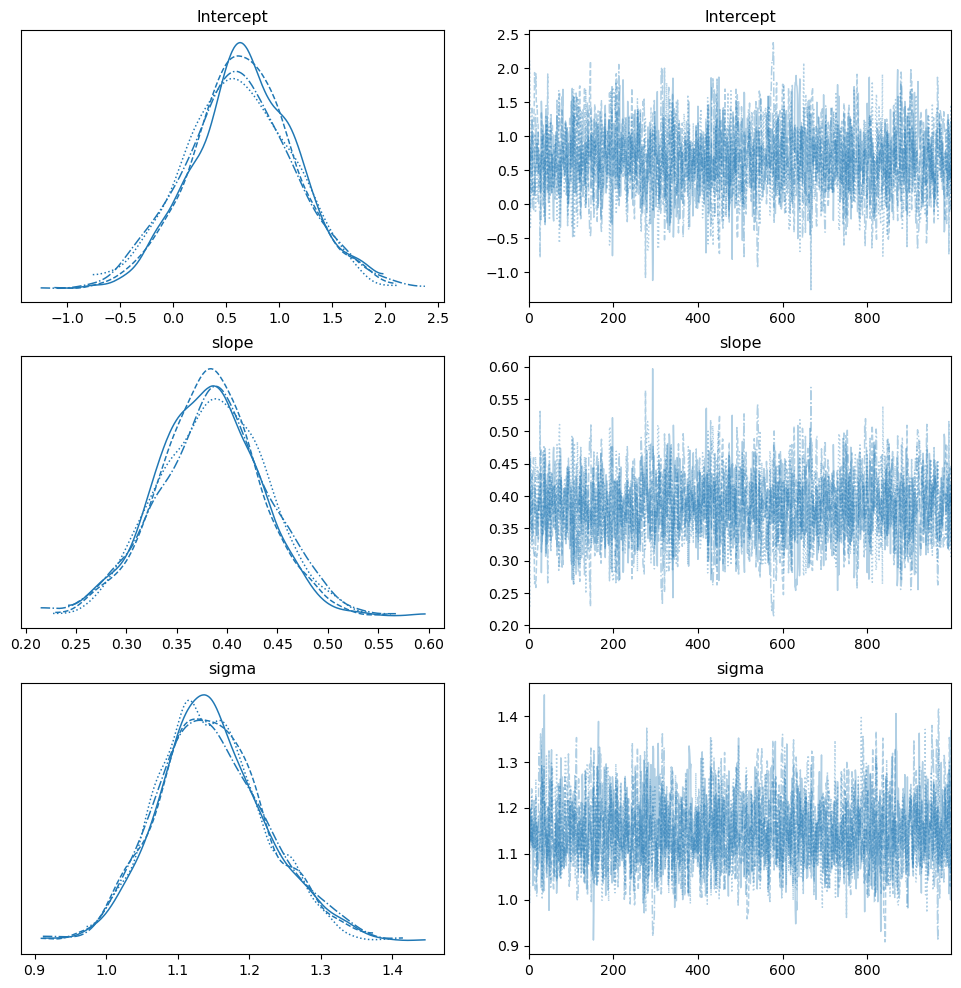

In [36]:
pm.plot_trace(linear_trace, figsize = (12, 12))

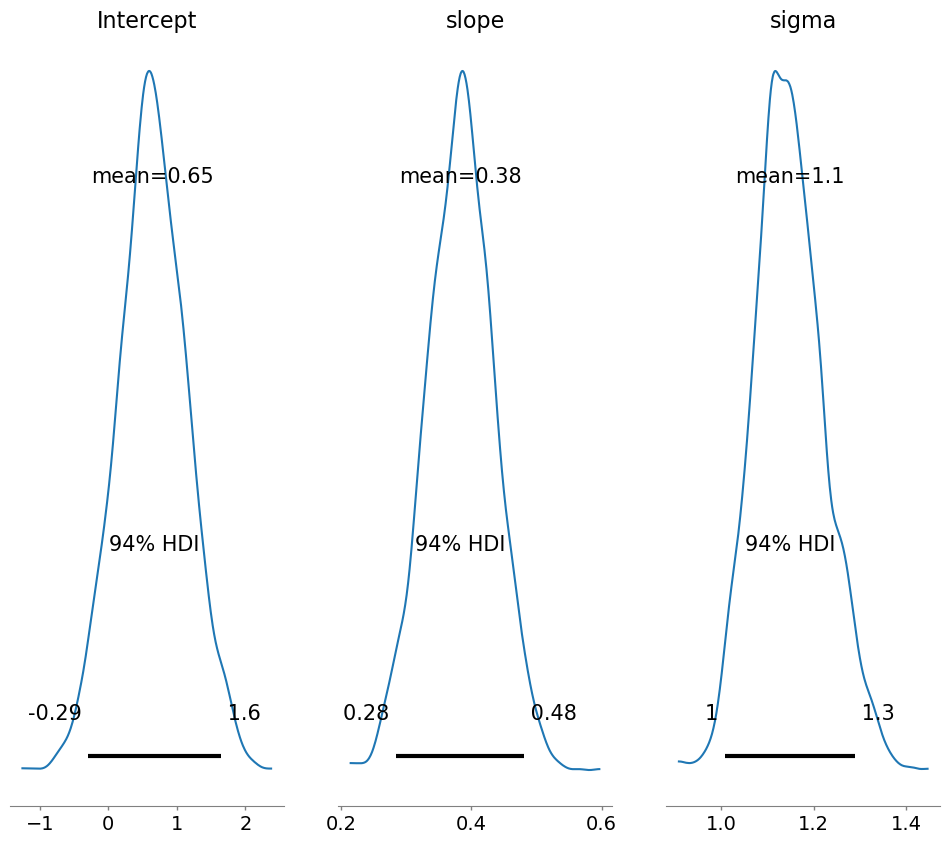

In [38]:
pm.plot_posterior(linear_trace, figsize = (12, 10));